In [3]:
import os
os.makedirs("outputs", exist_ok=True)

In [4]:
from google.colab import files
uploaded = files.upload()

Saving historical_data.csv to historical_data.csv
Saving fear_greed_index.csv to fear_greed_index.csv


In [5]:
import pandas as pd
trader_df = pd.read_csv('historical_data.csv')
sentiment_df = pd.read_csv('fear_greed_index.csv')


In [6]:
trader_df.head()
sentiment_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [7]:
print(trader_df.columns.tolist())
print(sentiment_df.columns.tolist())

['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp']
['timestamp', 'value', 'classification', 'date']


In [8]:
trader_df.columns = trader_df.columns.str.strip().str.lower()
sentiment_df.columns = sentiment_df.columns.str.strip().str.lower()

In [9]:
trader_df['timestamp ist'] = pd.to_datetime(trader_df['timestamp ist'], errors='coerce')
trader_df['date'] = trader_df['timestamp ist'].dt.date

sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.date


In [10]:
merge_df = pd.merge(trader_df, sentiment_df, on='date', how='left')

In [11]:
merge_df[['account', 'coin', 'closed pnl', 'side', 'classification']].head(100)

,account,coin,closed pnl,side,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,0.000000,BUY,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,0.000000,BUY,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,0.000000,BUY,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,0.000000,BUY,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,0.000000,BUY,Greed
...,...,...,...,...,...
95,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,101.447367,SELL,Extreme Greed
96,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,120.841353,SELL,Extreme Greed
97,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,120.928211,SELL,Extreme Greed
98,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,101.193105,SELL,Extreme Greed


In [12]:
merge_df.to_csv('clean_trader_sentiment.csv', index=False)

In [13]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   account           211224 non-null  object        
 1   coin              211224 non-null  object        
 2   execution price   211224 non-null  float64       
 3   size tokens       211224 non-null  float64       
 4   size usd          211224 non-null  float64       
 5   side              211224 non-null  object        
 6   timestamp ist     79225 non-null   datetime64[ns]
 7   start position    211224 non-null  float64       
 8   direction         211224 non-null  object        
 9   closed pnl        211224 non-null  float64       
 10  transaction hash  211224 non-null  object        
 11  order id          211224 non-null  int64         
 12  crossed           211224 non-null  bool          
 13  fee               211224 non-null  float64       
 14  trad

In [14]:
merge_df.isnull().sum().sort_values(ascending = False)

,0
timestamp_y,175360
value,175360
classification,175360
timestamp ist,131999
date,131999
execution price,0
coin,0
account,0
size tokens,0
size usd,0


In [15]:
merge_df_clean = merge_df.dropna(subset = ['classification', 'closed pnl', 'coin', 'side'])

In [16]:
merge_df_clean.duplicated().sum()

np.int64(0)

In [17]:
merge_df_clean.describe()

,execution price,size tokens,size usd,timestamp ist,start position,closed pnl,order id,fee,trade id,timestamp_x,timestamp_y,value
count,35864.000000,3.586400e+04,3.586400e+04,35864,3.586400e+04,35864.000000,3.586400e+04,35864.000000,3.586400e+04,3.586400e+04,3.586400e+04,35864.00000
mean,7596.431745,1.004709e+04,4.920359e+03,2024-11-29 15:03:36.594914560,2.701678e+04,101.070948,5.844251e+10,1.028091,5.619946e+14,1.732824e+12,1.732869e+09,51.33496
min,0.000005,5.630000e-06,0.000000e+00,2023-01-05 01:06:00,-1.050000e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,1.680000e+12,1.672897e+09,15.00000
25%,3.245975,2.588700e+00,1.665300e+02,2024-09-12 12:47:00,-2.638983e+02,0.000000,5.240387e+10,0.012518,2.780000e+14,1.730000e+12,1.726119e+09,28.00000
50%,16.390000,2.820000e+01,5.979050e+02,2025-01-05 07:06:00,7.010137e+01,0.000000,6.815193e+10,0.084384,5.620000e+14,1.740000e+12,1.736055e+09,49.00000
75%,172.590000,1.990000e+02,2.220243e+03,2025-03-04 13:18:00,1.090053e+04,10.735428,7.641909e+10,0.398132,8.460000e+14,1.740000e+12,1.741066e+09,72.00000
max,103265.000000,1.582244e+07,1.190250e+06,2025-05-02 23:59:00,3.050948e+07,71535.716740,9.014923e+10,212.298921,1.130000e+15,1.750000e+12,1.746164e+09,90.00000
std,23547.203213,2.060973e+05,2.203314e+04,NaN,4.308246e+05,1364.610762,2.240666e+10,4.937482,3.262737e+14,1.082266e+10,1.134941e+07,22.06305


In [18]:
merge_df_clean['classification'].value_counts()

,count
classification,
Fear,13869
Greed,11292
Extreme Greed,5621
Neutral,2756
Extreme Fear,2326


In [19]:
merge_df_clean['side'].value_counts()

,count
side,
SELL,19301
BUY,16563


In [20]:
merge_df_clean['coin'].value_counts().head(10)

,count
coin,
HYPE,7302
@107,6908
ETH,4757
BTC,3162
SOL,1720
PURR/USDC,539
FTT,437
WLD,414
FARTCOIN,412


In [21]:
merge_df_clean = merge_df.dropna(subset=['classification', 'closed pnl', 'coin', 'side'])

In [22]:
merge_df_clean = merge_df_clean.drop_duplicates()

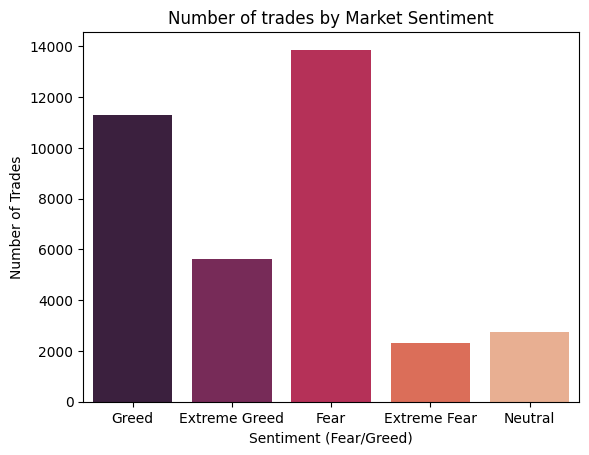

<Figure size 640x480 with 0 Axes>

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data = merge_df_clean, x = 'classification', palette = 'rocket',hue='classification')
plt.title("Number of trades by Market Sentiment")
plt.xlabel("Sentiment (Fear/Greed)")
plt.ylabel("Number of Trades")
plt.show()
plt.savefig("outputs/trades_by_Sentiment.png")

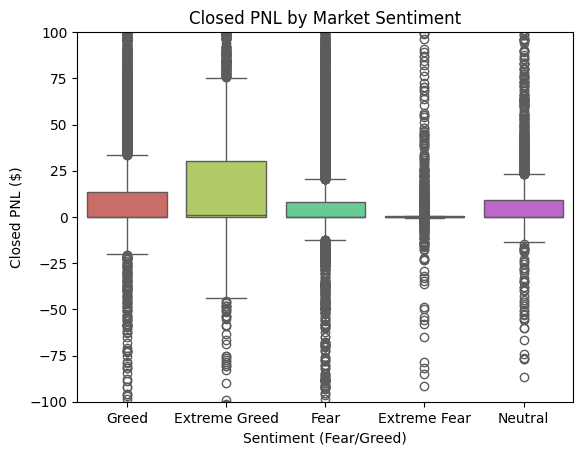

<Figure size 640x480 with 0 Axes>

In [24]:
sns.boxplot(data = merge_df_clean, x = 'classification', y = 'closed pnl', palette = 'hls',hue='classification')
plt.title("Closed PNL by Market Sentiment")
plt.xlabel("Sentiment (Fear/Greed)")
plt.ylabel("Closed PNL ($)")
plt.ylim(-100,100)
plt.show()
plt.savefig("outputs/pnl_by_sentiment.png")

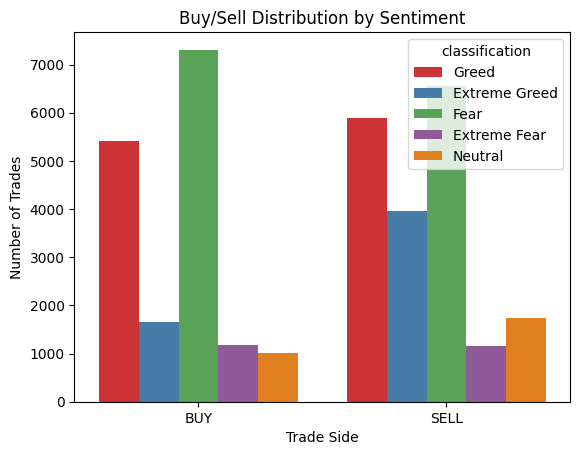

<Figure size 640x480 with 0 Axes>

In [25]:
sns.countplot(data = merge_df_clean, x = 'side', hue ='classification', palette = 'Set1')
plt.title("Buy/Sell Distribution by Sentiment")
plt.xlabel("Trade Side")
plt.ylabel("Number of Trades")
plt.show()
plt.savefig("outputs/Side_by_Sentiment.png")

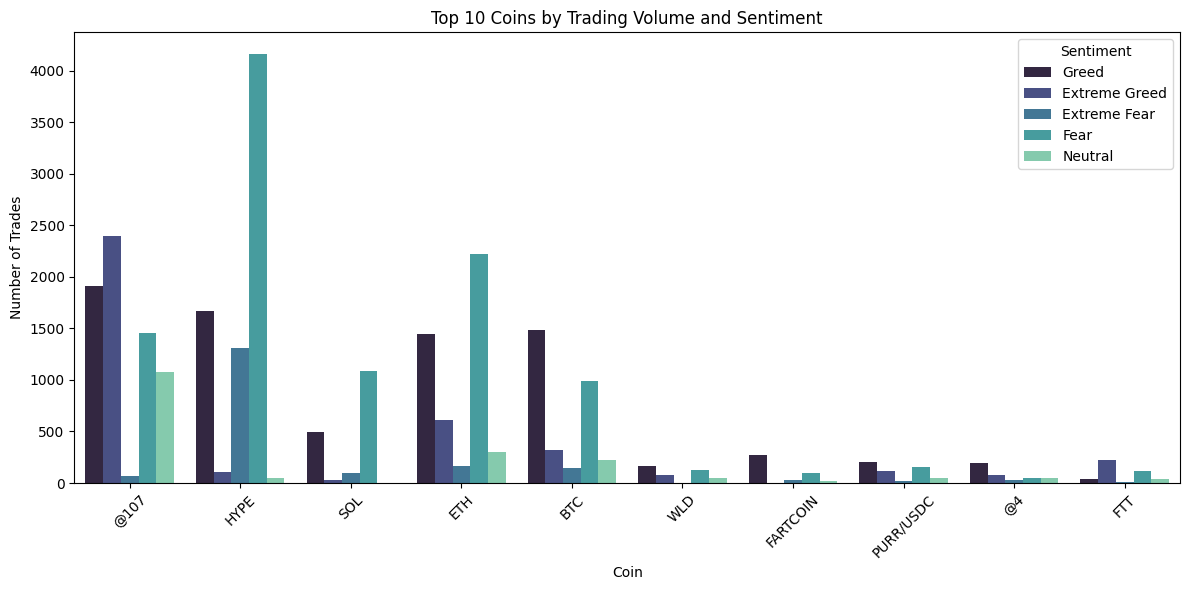

<Figure size 640x480 with 0 Axes>

In [26]:
top_coins_overall = ( merge_df_clean['coin'].value_counts().head(10).index)
filtered = merge_df_clean[merge_df_clean['coin'].isin(top_coins_overall)]

plt.figure(figsize=(12,6))
sns.countplot(data = filtered, x='coin', hue='classification', palette = 'mako')
plt.xticks(rotation = 45)
plt.title("Top 10 Coins by Trading Volume and Sentiment")
plt.xlabel("Coin")
plt.ylabel("Number of Trades")
plt.tight_layout()
plt.legend(title = 'Sentiment')
plt.show()
plt.savefig("outputs/Top10_Coins_Volume_by_Sentiment.png")

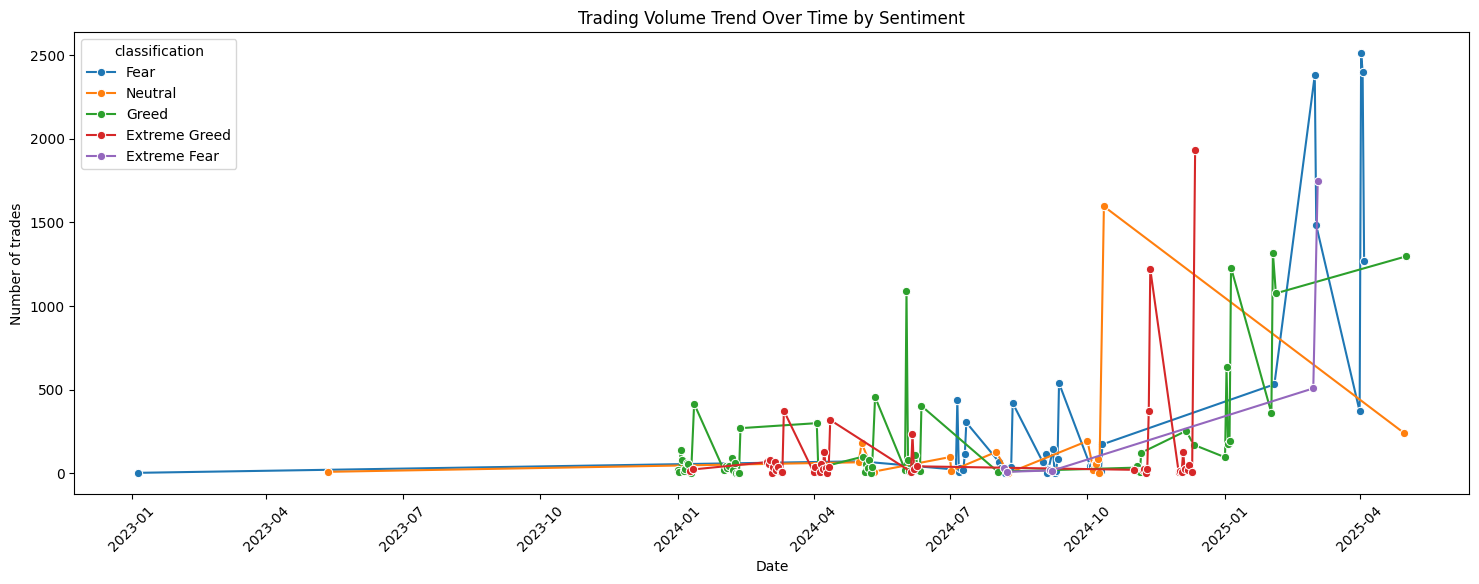

<Figure size 640x480 with 0 Axes>

In [27]:
trend_df = merge_df_clean.groupby(['date','classification']).size().reset_index(name = 'trade_count')

plt.figure(figsize = (18,6))
sns.lineplot(data = trend_df, x = 'date', y = 'trade_count', hue = 'classification', marker='o')
plt.title("Trading Volume Trend Over Time by Sentiment")
plt.xlabel("Date")
plt.ylabel("Number of trades")
plt.xticks(rotation = 45)
plt.show()
plt.savefig("outputs/sentiment_trend_over_time.png")

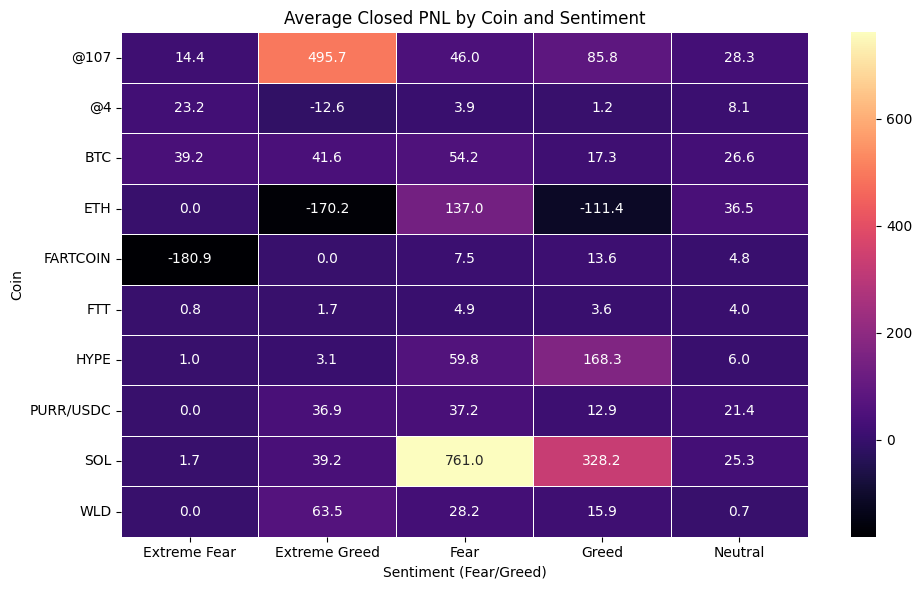

<Figure size 640x480 with 0 Axes>

In [28]:
top_pnl_coins = ( merge_df_clean['coin'].value_counts().head(10).index)

coin_pnl = (merge_df_clean[merge_df_clean['coin'].isin(top_pnl_coins)].groupby(['coin', 'classification'])['closed pnl'].mean().unstack().fillna(0))

plt.figure(figsize =(10,6))
sns.heatmap(coin_pnl, annot = True, cmap = 'magma', fmt = '.1f', linewidth = 0.5)
plt.title("Average Closed PNL by Coin and Sentiment")
plt.xlabel("Sentiment (Fear/Greed)")
plt.ylabel("Coin")
plt.tight_layout()
plt.show()
plt.savefig("outputs/avg_pnl_by_coin_and_sentiment.png")